In [54]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import utils
import pandas as pd
utils.set_pretty_prints()

In [2]:
DATA_FOLDER = '../data'
DATA_FILE = 'restocracy_all_data.pkl'

In [3]:
with open(os.path.join(DATA_FOLDER, DATA_FILE), 'rb') as fh:
    data = pickle.load(fh)

In [4]:
data[0]

{'price': '202 lei',
 'review': ' \n Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing \n Maize s-a deschis la inceputul lui noiembrie 2017 in mansarda unui (fel de) bloc cu doua etaje de pe eleganta strada Paris, aproape de Piata Dorobantilor. Poti sa o iei, la fel de bine, si ca pe o casa veche din Bucurestiul vechi, facuta fara imaginatie, sau cu economie la arhitect. Casa e renovata recent, iar zona e atat de frumoasa si de aristocratica, incat orice casa de acolo nu poate sa fie decat frumoasa si ea, indiferent cum ar arata si in ce stare ar fi. \n Daca cei care au construit batrana casa nu au adus arhitecti cu imaginatie, cei care au transformat mansarda in restaurantul Maize au facut-o. Totul arata foarte bine acolo, au pus in valoare fiecare coltisor si detaliu, au reusit sa o umple si de lumina, si au facut loc si bucatariei chiar in mijloc, cu plite si gratare cu tot, dupa cum se vede si in poze, care ma scutesc de mai mult scris. Acolo, sus, au si o

In [5]:
len(data)

200

In [6]:
prices = [x['price'] for x in data]
reviews = [x['review'] for x in data]

In [7]:
prices[:5]

['202 lei', '176 lei', '187 lei', '264 lei', '187 lei']

In [8]:
reviews[0]

' \n Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing \n Maize s-a deschis la inceputul lui noiembrie 2017 in mansarda unui (fel de) bloc cu doua etaje de pe eleganta strada Paris, aproape de Piata Dorobantilor. Poti sa o iei, la fel de bine, si ca pe o casa veche din Bucurestiul vechi, facuta fara imaginatie, sau cu economie la arhitect. Casa e renovata recent, iar zona e atat de frumoasa si de aristocratica, incat orice casa de acolo nu poate sa fie decat frumoasa si ea, indiferent cum ar arata si in ce stare ar fi. \n Daca cei care au construit batrana casa nu au adus arhitecti cu imaginatie, cei care au transformat mansarda in restaurantul Maize au facut-o. Totul arata foarte bine acolo, au pus in valoare fiecare coltisor si detaliu, au reusit sa o umple si de lumina, si au facut loc si bucatariei chiar in mijloc, cu plite si gratare cu tot, dupa cum se vede si in poze, care ma scutesc de mai mult scris. Acolo, sus, au si o mica terasa pe acoperis, foarte

In [9]:
reviews[0].split()[:10]

['Noul',
 'restaurant',
 'vedeta',
 'al',
 'Bucurestiului,',
 'o',
 'constructie',
 'geniala',
 'de',
 'marketing']

In [10]:
def get_vocab(lst_docs):
    dct_occ = {}
    for doc in lst_docs:
        words = doc.split()
        for word in words:
            if word in dct_occ:
                dct_occ[word] += 1
            else:
                dct_occ[word] = 1
    occs = [(w, a) for w,a in dct_occ.items()]
    occs = sorted(occs, key=lambda x: x[1], reverse=True)
    dct_w2i = {w[0]:i+1 for i,w in enumerate(occs)}
    dct_w2i['UNK'] = 0
    dct_i2w = {i:w for w,i in dct_w2i.items()}
    return occs, dct_w2i, dct_i2w

In [11]:
oc, w2i, i2w = get_vocab(reviews)
oc[:10]

[('de', 7642),
 ('si', 6195),
 ('in', 3904),
 ('la', 3650),
 ('cu', 3275),
 ('mai', 3019),
 ('ca', 2698),
 ('sa', 2655),
 ('din', 2230),
 ('care', 2147)]

In [12]:
w2i['Noul']

2181

In [13]:
i2w[100]

'bune'

In [14]:
w2i.get('bunicel',0)

0

In [15]:
len(w2i)

22000

In [16]:
def doc_to_tokens(doc, dct_w2i, unk=0):
    tokens = []
    for word in doc.split():
        tokens.append(dct_w2i.get(word, unk))
    return tokens

def tokens_to_doc(tokens, dct_i2w):
    words = []
    for token in tokens:
        words.append(dct_i2w[token])
    return " ".join(words)

In [17]:
t1 = doc_to_tokens(
    doc="ana are foarte multe mere frumusele si putin viermanoase", 
    dct_w2i=w2i
)
t1

[0, 59, 22, 46, 9960, 0, 2, 97, 0]

In [18]:
tokens_to_doc(t1, i2w)

'UNK are foarte multe mere UNK si putin UNK'

(array([72., 83., 19.,  8.,  8.,  1.,  3.,  1.,  3.,  2.]),
 array([  255. ,  3259.2,  6263.4,  9267.6, 12271.8, 15276. , 18280.2, 21284.4, 24288.6, 27292.8, 30297. ]),
 <a list of 10 Patch objects>)

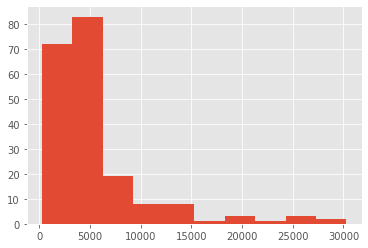

In [19]:
review_lens = [len(r) for r in reviews]
plt.hist(review_lens)

In [20]:
# but we need words
all_data = [doc_to_tokens(doc, dct_w2i=w2i) for doc in reviews]
tokens_to_doc(all_data[10][:10], i2w)

'Ei bine, nu stiu sa raspund la intrebarea asta… E'

In [21]:
reviews[10][:100]

' \n Ei bine, nu stiu sa raspund la intrebarea asta… \n E greu de crezut ca sunt atat de multe restaura'

(array([12., 52., 68., 24., 10., 10.,  4.,  2.,  3.,  5.,  1.,  0.,  1.,  2.,  0.,  2.,  2.,  0.,  0.,  2.]),
 array([  34. ,  290.5,  547. ,  803.5, 1060. , 1316.5, 1573. , 1829.5, 2086. , 2342.5, 2599. , 2855.5, 3112. , 3368.5, 3625. , 3881.5, 4138. , 4394.5, 4651. , 4907.5, 5164. ]),
 <a list of 20 Patch objects>)

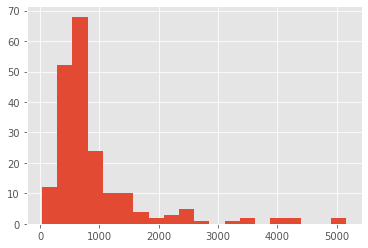

In [22]:
reviews_token_lens = [len(r) for r in all_data]
plt.hist(reviews_token_lens, bins=20)

In [26]:
all_data_fix = [r[:500] for r in all_data]
print(len(all_data_fix[123]))
print(all_data_fix[0])

500
[2181, 26, 2751, 37, 244, 15, 1377, 4219, 1, 2420, 3573, 86, 127, 4, 1644, 78, 1160, 886, 3, 4220, 160, 10654, 10655, 635, 5, 106, 5192, 1, 11, 3076, 314, 3077, 128, 1, 125, 1781, 1290, 8, 15, 10656, 4, 69, 1, 173, 2, 7, 11, 15, 188, 1782, 9, 528, 636, 502, 82, 5193, 27, 5, 3574, 4, 5194, 141, 16, 2421, 5195, 122, 239, 16, 129, 1, 529, 2, 1, 4221, 637, 251, 188, 1, 98, 13, 88, 8, 79, 89, 529, 2, 598, 1979, 40, 63, 199, 2, 3, 19, 1980, 63, 6805, 143, 58, 10, 21, 745, 3078, 188, 13, 21, 489, 2752, 5, 5193, 58, 10, 21, 4222, 4220, 3, 90, 3573, 21, 5196, 1538, 199, 22, 36, 137, 21, 174, 3, 2422, 138, 6806, 2, 6807, 21, 412, 8, 15, 1783, 2, 1, 10657, 2, 21, 109, 196, 2, 848, 47, 3, 1233, 5, 10658, 2, 6808, 5, 990, 49, 40, 20, 283, 2, 3, 1161, 10, 118, 10659, 1, 6, 29, 3575, 2423, 717, 21, 2, 15, 430, 136, 11, 3079, 22, 529, 2, 598, 545, 2, 13, 112, 45, 14, 179, 42, 41, 2, 1454, 9, 10660, 148, 5, 582, 474, 3, 1162, 12, 275, 991, 66, 63, 259, 114, 98, 15, 136, 1, 992, 14, 2182, 1981, 16, 

In [27]:
len(reviews[123].split())

[]

In [28]:
def token_docs_to_array(tokenized_documents, maxwords=500):
    lst_docs = []
    for token_doc in tokenized_documents:
        if len(token_doc) > maxwords:
            token_doc = token_doc[:maxwords]
        else:
            token_doc = token_doc + (maxwords - len(token_doc)) * [0]
        lst_docs.append(token_doc)
    return np.array(lst_docs)

np_data = token_docs_to_array(all_data)
np_data.shape

(200, 500)

In [29]:
np.argmin([len(x) for x in all_data])

165

In [30]:
all_data[165]

[10512,
 25,
 12,
 26,
 5,
 216,
 508,
 2,
 1882,
 5743,
 3,
 1185,
 20239,
 6783,
 10513,
 20240,
 9,
 3963,
 1185,
 2929,
 6783,
 10513,
 9,
 4895,
 5,
 61,
 10512,
 2,
 20241,
 1280,
 6783,
 611,
 2,
 1345]

In [31]:
reviews[165]

' \n Zigolini este un restaurant cu specific italian si international, localizat in Complexul Comercial Jolie Ville Galleria din Baneasa. \n Complexul comercial Jolie Ville din Voluntari, cu restaurantele Zigolini si Mandarin, cafeneaua Jolie Cafe si altele…'

In [32]:
np_data[165]

array([10512,    25,    12,    26,     5,   216,   508,     2,  1882,  5743,     3,  1185, 20239,  6783, 10513, 20240,     9,  3963,  1185,  2929,  6783, 10513,     9,  4895,     5,    61, 10512,     2, 20241,  1280,  6783,   611,     2,  1345,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [34]:
y = np.array([int(x.split()[0]) for x in prices])
y[165]

150

In [59]:
from sklearn.model_selection import train_test_split

#x_train, x_dev, y_train, y_dev = train_test_split(np_data, y, random_state=103, test_size=0.15)
# not above split as we have to replicate previous dataset so we can compare results
x_train, x_dev, y_train, y_dev = train_test_split(np_data, y, test_size=0.10, random_state=1010)

In [60]:
print(x_train.shape)
print(x_dev.shape)


(180, 500)
(20, 500)


In [36]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [61]:
EPOCHS = 30

## Finally we define the simple neural model

In [68]:
tf_inp = tf.keras.layers.Input((500,), name='doc_input')
print("'Categorical' data input", tf_inp)
embedding_projection = tf.keras.layers.Embedding(len(w2i), 100, name='word_embeds')
print(embedding_projection)
tf_x = embedding_projection(tf_inp)
print(tf_x)
print(embedding_projection.get_weights()[0].shape)

'Categorical' data input Tensor("doc_input_4:0", shape=(None, 500), dtype=float32)
Tensor("word_embeds_4/Identity:0", shape=(None, 500, 100), dtype=float32)
(22000, 100)


In [69]:
from_2d_to_1d_layer = tf.keras.layers.Flatten(name='flatten_doc_vectors')

tf_x = from_2d_to_1d_layer(tf_x)
print(tf_x)

Tensor("flatten_doc_vectors_2/Identity:0", shape=(None, 50000), dtype=float32)


In [70]:
# add some regularization
tf_x = tf.keras.layers.Dropout(0.5, name='hide_the_features')(tf_x)

In [71]:
tf_out = tf.keras.layers.Dense(1)(tf_x)
print(tf_out)

Tensor("dense_3/Identity:0", shape=(None, 1), dtype=float32)


In [73]:
model = tf.keras.models.Model(tf_inp, tf_out, name='naive_model')
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "naive_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
doc_input (InputLayer)       [(None, 500)]             0         
_________________________________________________________________
word_embeds (Embedding)      (None, 500, 100)          2200000   
_________________________________________________________________
flatten_doc_vectors (Flatten (None, 50000)             0         
_________________________________________________________________
hide_the_features (Dropout)  (None, 50000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 50001     
Total params: 2,250,001
Trainable params: 2,250,001
Non-trainable params: 0
_________________________________________________________________


In [74]:
hist = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_dev, y_dev),
    epochs=EPOCHS
)

Train on 180 samples, validate on 20 samples
Epoch 1/30
180/180 [==============================] - 1s 3ms/sample - loss: 23446.1763 - val_loss: 23361.7246
Epoch 2/30
180/180 [==============================] - 0s 742us/sample - loss: 23155.9205 - val_loss: 22960.5938
Epoch 3/30
180/180 [==============================] - 0s 748us/sample - loss: 22602.5774 - val_loss: 22219.0781
Epoch 4/30
180/180 [==============================] - 0s 770us/sample - loss: 21653.2257 - val_loss: 20954.2969
Epoch 5/30
180/180 [==============================] - 0s 704us/sample - loss: 20104.3285 - val_loss: 19027.1602
Epoch 6/30
180/180 [==============================] - 0s 759us/sample - loss: 17823.7605 - val_loss: 16384.0371
Epoch 7/30
180/180 [==============================] - 0s 909us/sample - loss: 14807.4037 - val_loss: 13159.6973
Epoch 8/30
180/180 [==============================] - 0s 842us/sample - loss: 11231.9973 - val_loss: 9731.1855
Epoch 9/30
180/180 [==============================] - 0s 803us

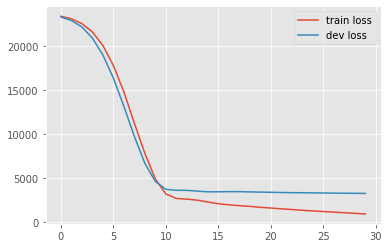

In [75]:
htrn = hist.history['loss']
hdev = hist.history['val_loss']
n_ep = len(htrn)
plt.figure()
plt.plot(np.arange(n_ep), htrn, label='train loss')
plt.plot(np.arange(n_ep), hdev, label='dev loss')
plt.legend()
plt.show()

In [76]:
y_pred = model.predict(x_dev)

In [77]:
print(y_dev.shape)
print(y_pred.shape)

(20,)
(20, 1)


In [79]:

df_res = pd.DataFrame(
    dict(
        Reality=y_dev,
        Predictions=y_pred.ravel()
    )
)
df_res

,Reality,Predictions
0,77,136.3239
1,104,128.0332
2,259,143.9572
3,82,129.0994
4,106,132.8245
5,208,150.5580
6,117,139.4830
7,82,133.5465
8,189,152.8024
9,130,145.2874


## NN HORECA Review Based Price Inference -  Homework ToDo

1. Maybe add more layers
2. Maybe change the way we naively transform from 500x100 to 50,000 vector?
3. Maybe train for more epochs
4. Maybe stop training at best val loss point
5. Review results